<a href="https://colab.research.google.com/github/Atik07/practical-machine-learning/blob/main/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math
 
%matplotlib inline

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


shape (28, 28)


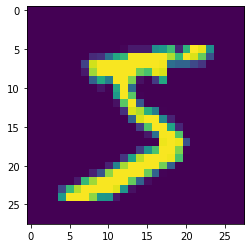

In [ ]:
plt.imshow(x_train[0])
print('shape',x_train[0].shape)
# print(x_train[0])

In [ ]:
 max= 255.0
 min= 0.0
 
 delta = max-min

 x_train = x_train/delta
 x_test = x_test/delta

In [ ]:
reduced_size = 64

In [ ]:
encoder_input = keras.Input(shape=(28,28,1), name="img")
#(28, 28, 1 ) = (height , width, color_channels)
x= keras.layers.Flatten()(encoder_input) #to flatten al input to 784 pixels with 1 channel
encoder_output = keras.layers.Dense(reduced_size, activation="relu")(x) # dense layer

encoder = keras.Model(encoder_input, encoder_output, name="encoder")

decoder_input = keras.layers.Dense(784, activation="relu")(encoder_output)
# x = keras.layers.Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((28,28,1))(decoder_input)

opt = keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

autoencoder.compile(opt, loss="mse")

autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, validation_split=0.1)

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               50960     
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0173 - val_loss: 0.0117
Epoch 2/10
16

[2.8060665  0.8461296  0.82500094 0.9340441  1.1753769  0.8088865
 1.0410578  1.2260809  1.5866352  0.5152567  0.78851414 1.1896296
 0.14631967 1.7424362  0.66152966 0.31083065 1.5535232  1.1963961
 0.4119217  0.         0.04989617 0.6128049  0.14282481 1.3732278
 0.9172584  0.52566993 0.8086829  0.         1.6493261  1.2211612
 0.18609723 0.05086936 0.467984   1.0933042  1.2988392  1.5147666
 0.4839167  0.72760797 0.51312435 0.41698247 1.0840784  1.0320065
 1.3402508  0.8688595  1.1491066  1.8129992  0.93411475 0.26479948
 0.70352685 0.556308   1.0751426  0.         0.7973404  1.4295869
 0.3543289  1.1784868  0.60304034 0.23786634 1.1305515  1.3505851
 0.07988013 2.4944377  1.0856909  0.26761714]
(64,)
0.08163265306122448


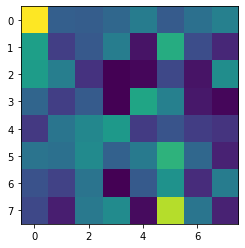

In [ ]:
example = encoder.predict([x_test[0].reshape(-1, 28, 28, 1)])[0]
print(example)
print(example.shape)
print(reduced_size/784)
plt.imshow(example.reshape((8,8)))

In [ ]:
test_image = x_test[1]

(28, 28)
<class 'numpy.ndarray'>


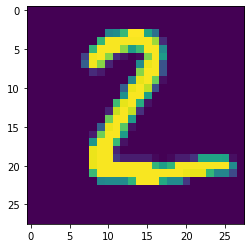

In [ ]:
print(test_image.shape)
print(type(test_image))
plt.imshow(test_image)

<class 'numpy.ndarray'>
(28, 28, 1)


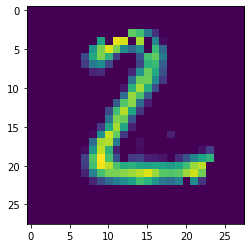

In [ ]:
ae_out = autoencoder.predict([test_image.reshape(-1, 28, 28, 1)])[0]
print(type(ae_out))
print(ae_out.shape)
plt.imshow(ae_out.reshape([28, 28]))

In [ ]:
import random

def add_noise(img, random_chance=5):
  noisy = []
  for row in img:
    new_row = []
    for pix in row:
      if random.choice(range(100)) <= random_chance:
        new_val = random.uniform(0, 1)
        new_row.append(new_val)
      else:
        new_row.append(pix)
    noisy.append(new_row)
  return np.array(noisy)

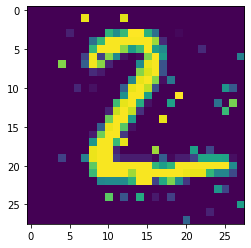

In [ ]:
test_image = add_noise(test_image)
plt.imshow(test_image)

<class 'numpy.ndarray'>
(28, 28, 1)


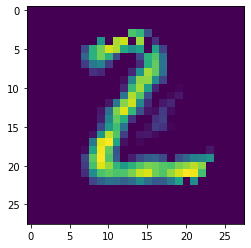

In [ ]:
ae_out = autoencoder.predict([test_image.reshape(-1, 28, 28, 1)])[0]
print(type(ae_out))
print(ae_out.shape)
plt.imshow(ae_out.reshape([28, 28]))